In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline


In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df=pd.read_csv('CRUDESUNFLOWEROIL.csv')

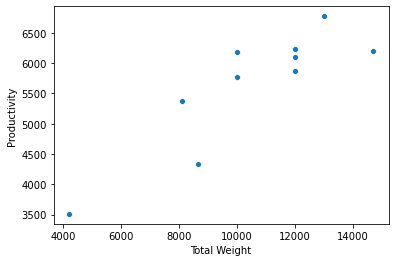

In [6]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [7]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,9.000000
mean,138.272727,195159.636364,43.427273,73.960000,10422.727273,0.104545,0.010455,0.0,0.651818,28.635455,5682.222727,17825.577778
std,64.084461,4195.410594,7.613065,37.494008,2831.904274,0.029108,0.002911,0.0,1.760147,36.409294,954.232131,4145.050609
min,12.000000,191278.000000,28.700000,36.050000,4200.000000,0.040000,0.004000,0.0,0.000000,0.000000,3512.200000,12851.000000
25%,96.500000,192009.000000,38.835000,47.110000,9325.000000,0.095000,0.009500,0.0,0.000000,0.615000,5568.545000,13386.200000
50%,146.000000,192816.000000,46.070000,66.050000,10000.000000,0.100000,0.010000,0.0,0.000000,13.050000,6097.390000,19083.000000
75%,186.500000,200208.500000,47.600000,93.850000,12000.000000,0.120000,0.012000,0.0,0.115000,49.015000,6189.335000,20019.000000
max,218.000000,200741.000000,56.970000,144.300000,14700.000000,0.150000,0.015000,0.0,5.870000,101.300000,6772.790000,24947.000000


In [40]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [41]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
print(lm.intercept_)

2761.149238920846


In [43]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.278993


In [44]:
predictions = lm.predict(X_test)

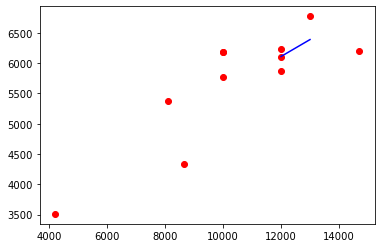

In [45]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 312.11336391683017
MSE: 102687.66968305531
RMSE: 320.4491686415418
r2_score: 0.49650959511654014


In [47]:
joblib.dump(lm,"Crude_Sunflower_Oil.pkl")#only execute if rmse is less than half of mean of productivity

['Crude_Sunflower_Oil.pkl']